<a href="https://colab.research.google.com/github/christianadriano/PCA_AquacultureSystem/blob/master/WithinGroup_EnvironmentalFactors_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd #tables for data wrangling
import numpy as np #basic statistical methods 
import io #for uploading data

#Manual option
from google.colab import files
uploaded = files.upload() #choose file dados_relativizados_carcinicultura.csv



Saving dados_relativizados_carcinicultura.csv to dados_relativizados_carcinicultura (2).csv


In [68]:
#Upload data from cvs file
df = pd.read_csv(io.StringIO(uploaded['dados_relativizados_carcinicultura.csv'].decode('utf-8'))) 

In [69]:
df.shape
column_names = df.columns
#Select fatores Ambientais 
feature_names = [name for name in column_names if name.startswith("A")] 

#feature_names = list(df.columns["A2_DA":"A4_EUC"])
#print(feature_names)
list_names = ['especie'] + feature_names
df_environment = df[list_names]
#df_environment.head()



In [ ]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_environment.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
print(x)


In [ ]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_environment[['especie']]], axis = 1)

['M. rosenbergii - Espirito Santo-'
 'P. vannamei - Sergipe - Semi intensivo' 'L. vannamei - Aquafort'
 'L. vannamei - Northern' 'L. vannamei - Aquacrusta' 'L. vannamei - HM'
 'L. vannamei - Ilha' 'L. vannamei - Carpixe' 'L. vannamei - Marinus'
 'L. vannamei - Aquabrasilis' 'L. vannamei - Aquarium - baixa densid.'
 'L. vannamei - Aquarium - alta densis'
 'L. vannamei - Aquarium-  bifasico']


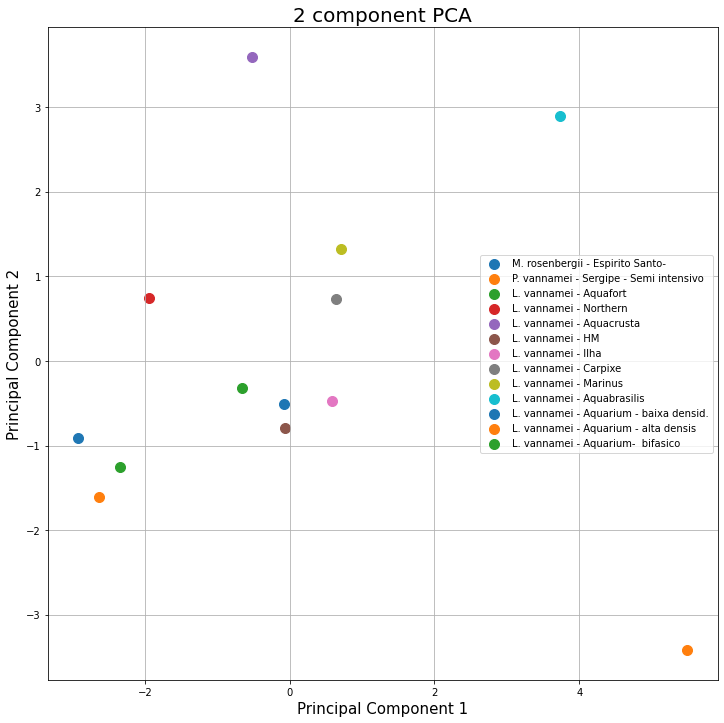

In [71]:
#Visualize results of PCA
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df_environment['especie'].to_numpy()
print(targets)
for target in targets:
    indicesToKeep = finalDf['especie'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 100)
ax.legend(targets)
ax.grid()

In [78]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))


variance explained by each component: [0.34023213 0.20209521]
total variance explained: 0.5423273442348485
